In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
combined_df = pd.read_csv("../../data/cri_annotations.csv")
# filtered_sheets = {sheet_name: df for sheet_name, df in all_sheets.items() 
#                    if not re.fullmatch(r'\d+', sheet_name)}

# dfs_with_names = []
# for sheet_name, df in filtered_sheets.items():
#     df['sheet_name'] = sheet_name
#     dfs_with_names.append(df)

# combined_df = pd.concat(dfs_with_names, ignore_index=True)

print(combined_df.columns)

Index(['question_id', 'chunk_header', 'text', 'question', 'reference',
       'candidate', 'score', 'annotator', 'labels'],
      dtype='object')


In [4]:
score_stats = combined_df['score'].describe()
print("Descriptive Statistics for Score:")
print(score_stats)

skewness = combined_df['score'].skew()
kurtosis = combined_df['score'].kurt()
print("\nSkewness:", skewness)
print("Kurtosis:", kurtosis)

Descriptive Statistics for Score:
count    490.000000
mean       2.624490
std        1.095544
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: score, dtype: float64

Skewness: -0.1794105492872431
Kurtosis: -1.2750329515112948


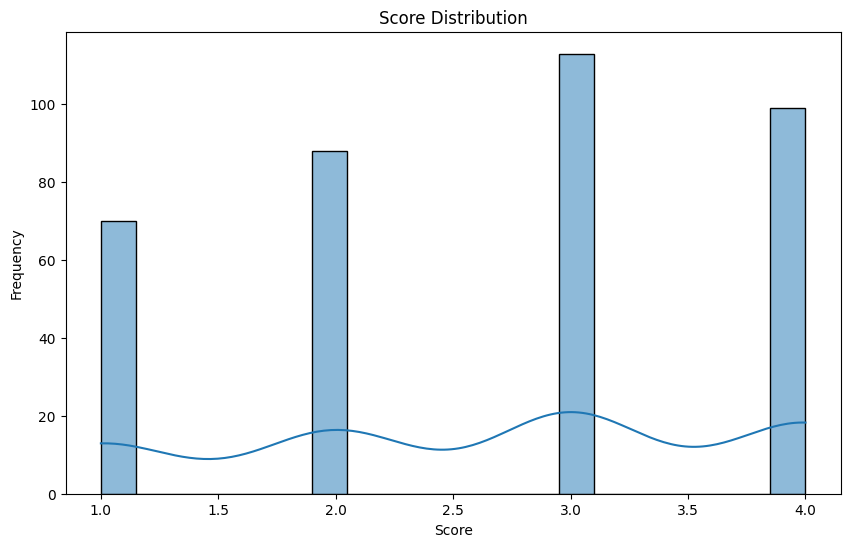

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(combined_df['score (1-4)'], kde=True, bins=20)
plt.title('Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

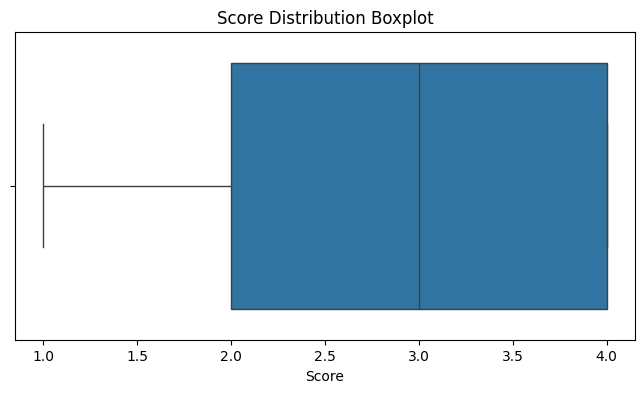

In [24]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=combined_df['score (1-4)'])
plt.title('Score Distribution Boxplot')
plt.xlabel('Score')
plt.show()

In [ ]:
def compute_stats(series):
    desc = series.describe()
    return pd.Series({
        'count': desc['count'],
        'mean': desc['mean'],
        'std': desc['std'],
        'min': desc['min'],
        '25%': desc['25%'],
        '50%': desc['50%'],
        '75%': desc['75%'],
        'max': desc['max'],
        'skew': series.skew(),
        'kurt': series.kurt()
    })

print("=== Statistics by Person ===\n")
name_groups = combined_df.groupby('sheet_name')
for name, group in name_groups:
    print(f"Name: {name}")
    stats = compute_stats(group['score (1-4)'])
    print(stats, "\n")

print("=== Statistics by Person and Question ===\n")
question_groups = combined_df.groupby(['sheet_name', 'question'])
for (name, question), group in question_groups:
    print(f"Name: {name} | Question: {question}")
    stats = compute_stats(group['score (1-4)'])
    print(stats, "\n")


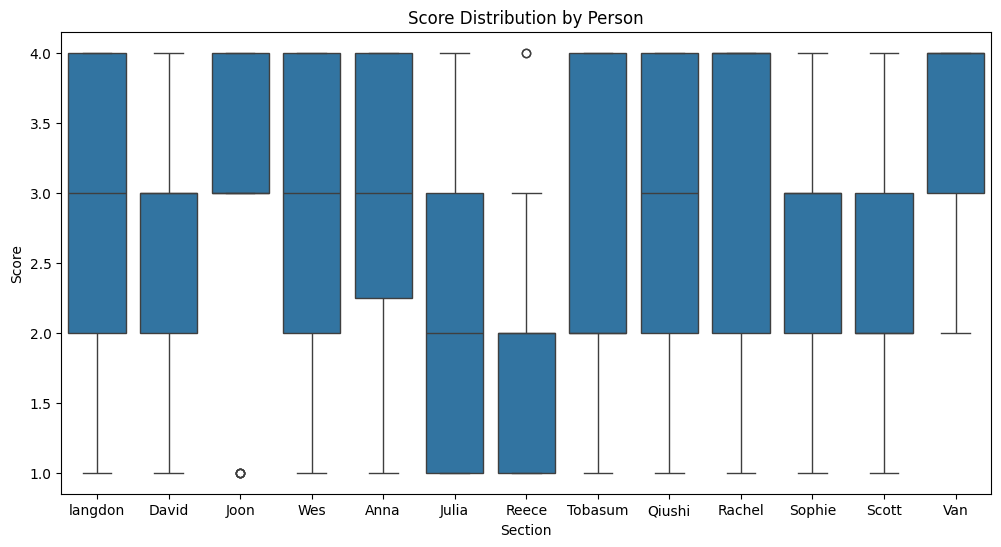

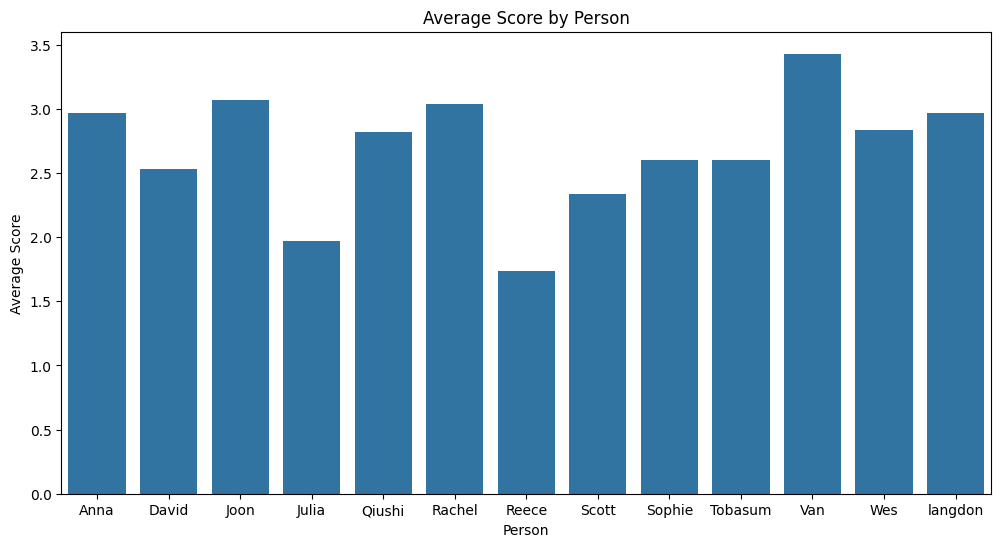

In [32]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='sheet_name', y='score (1-4)', data=combined_df)
plt.title('Score Distribution by Person')
plt.xlabel('Section')
plt.ylabel('Score')
plt.show()

avg_scores_by_section = combined_df.groupby('sheet_name')['score (1-4)'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='sheet_name', y='score (1-4)', data=avg_scores_by_section)
plt.title('Average Score by Person')
plt.xlabel('Person')
plt.ylabel('Average Score')
plt.show()

Average Score for Each Question:
                                             question  score (1-4)
0   How can we abstract 'doing something N times' ...     2.000000
1   How can you create and update bindings in Java...     2.500000
2   How do self-regulating learners adapt their sk...     2.296296
3   What approach was used to infer affect by anal...     2.966667
4   What are examples of cases where state legisla...     2.333333
5   What are minifiers in the context of JavaScrip...     2.666667
6   What are researchers developing methods for in...     2.750000
7   What are some examples of areas in which gover...     3.000000
8   What are some examples of characters that can ...     3.000000
9   What are some legal systems that differ signif...     2.000000
10  What are some of the principal defenses that c...     4.000000
11  What are some of the themes of research in the...     2.333333
12  What are some potential themes of future resea...     2.444444
13  What are the advantages o

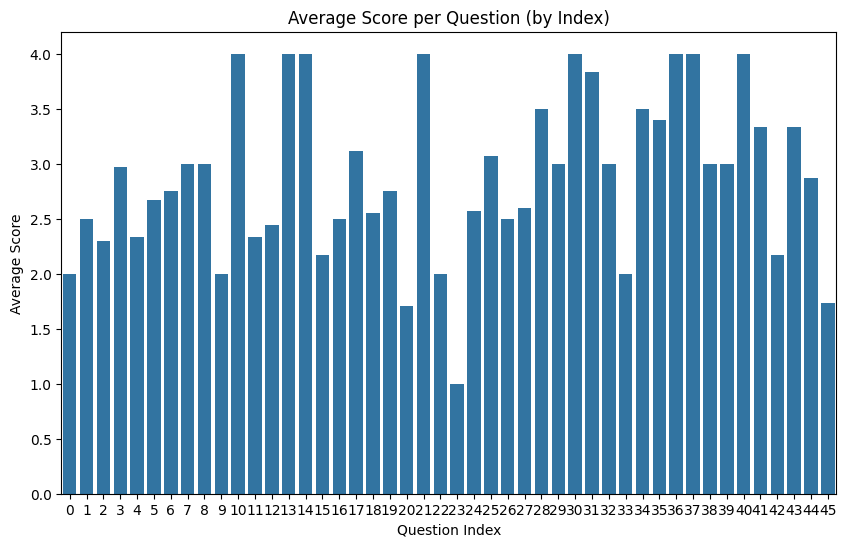

In [37]:
clean_df = combined_df.dropna(subset=['score (1-4)'])

avg_scores_by_question = clean_df.groupby('question')['score (1-4)'].mean().reset_index()
print("Average Score for Each Question:")
print(avg_scores_by_question)

avg_scores_by_question['question_index'] = avg_scores_by_question.index

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_scores_by_question, x='question_index', y='score (1-4)')

plt.xlabel("Question Index")
plt.ylabel("Average Score")
plt.title("Average Score per Question (by Index)")

plt.show()